#Problem Statement - You have given the dataset of all the medical condition of the patient ,you have to build a Classifier model that can predict how likely the patient can get a heart stroke.

# Importing the libraries

In [1]:
# For mathematical operations
import numpy as np

# For data manipulation
import pandas as pd

# For data visualisation
import matplotlib.pyplot as plt

# For data visualisation
import seaborn as sns

# For data cleaning
import re

# For mathematical operations
import math

# For loading the Logistic regression algorithm
from sklearn.linear_model import LogisticRegression

# For splitting the data
from sklearn.model_selection import train_test_split

# Coverting categorical data into numerical form
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Accuracy matrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# For loading the Decision Tree Classification algorithm
from sklearn.tree import DecisionTreeClassifier

# For loading the Support Vector Classification algorithm
from sklearn.svm import SVC

# For loading the Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier

# Importing the dataset

Dataset link: https://drive.google.com/file/d/1euLRHhWFRC4pBD5O39rMkZmNFuLAqJm9/view?usp=sharing

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ayush/Devtown/Project-9 healthcare-dataset/healthcare-dataset-stroke-data.csv')

Data set Description:

1. gender -> Male, Female, others

2. hypertension 

*   0 -> No hypertension
*   1 -> hypertension

3. heart_disease

*   0 -> No heart_disease
*   1 -> heart_disease

4. ever_married -> Yes, NO

5. work_type -> Private, Self-employed, Never_worked, Govt_job, children

6. Residence_type -> Urban, Rural

7. avg_glucose_level -> glucose level of the patient

8. bmi ->  bmi report of the patient

9. smoking_status -> formerly smoked, never smoked, smokes

10. stroke

*   0 -> Not having changes of getting heart stroke.
*   1 -> having changes of getting heart stroke.








#EDA - Exploratory Data Analysis

In [3]:
# First five rows of dataframe
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Last Five rows of dataframe
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
# General information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# Statistical information of the dataframe
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
# Transpose of statistical information of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [8]:
# Remove the 'id' column as it do not have significiant effect on the stroke
df.drop('id',axis=1,inplace=True)

In [9]:
# First five rows of dataframe
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
# Unique values in gender column
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [11]:
# Sum of unique value in gender column
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<Axes: >

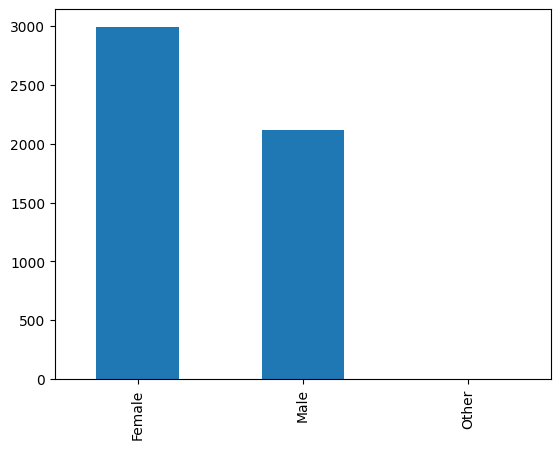

In [12]:
# Plotting the count of each category in gender column
df.gender.value_counts().plot(kind='bar')

In [13]:
# Replacing the Other with Female as only one value of Other is present
df.gender.replace('Other', 'Female', inplace = True)

In [14]:
# Unique values in gender column
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [15]:
# Sum of unique value in gender column
df.gender.value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

In [16]:
# Creating object for LabelEncoder
enc = LabelEncoder()

In [17]:
# Applying label encoder
df.gender = enc.fit_transform(df.gender)

In [18]:
# Sum of unique value in gender column
df.gender.value_counts()

0    2995
1    2115
Name: gender, dtype: int64

Substituted in gender column:

 * Female -> 0
 
 * Male -> 1

In [19]:
# Row in datframe which is having the age value as 0.08
df[df.age == 0.08]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1614,0,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3295,1,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


In [20]:
# Row in datframe which is having the work_type value as children
df[df.work_type == 'children']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,0,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,0,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
249,1,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
282,0,3.00,0,0,No,children,Urban,73.74,16.0,Unknown,0
290,1,13.00,0,0,No,children,Urban,114.84,18.3,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
5089,0,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0
5094,1,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,0
5095,1,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
5098,1,9.00,0,0,No,children,Urban,71.88,17.5,Unknown,0


In [21]:
# Converting the value to its ceiling value
math.ceil(0.08)

1

In [22]:
# Converting the values age column to its ceiling value
for i in range(len(df.age)):
  df.age[i] = math.ceil(df.age[i])

<ipython-input-22-2ab9ee0bdbdd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.age[i] = math.ceil(df.age[i])


In [23]:
# Statistical information of the age column
df.age.describe()

count    5110.000000
mean       43.237769
std        22.591958
min         1.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [24]:
# Change the datatype of age column as int type
df.age =  df.age.astype('int')

In [25]:
# General information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 439.3+ KB


In [26]:
# First five rows of dataframe
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,1,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,0,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,0,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [27]:
# Statistical information of the hypertension column
df.hypertension.describe()

count    5110.000000
mean        0.097456
std         0.296607
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64

In [28]:
# Sum of unique value in hypertension column
df.hypertension.value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [29]:
4612/5110  

0.9025440313111546

In [30]:
# Sum of unique value in heart_disease column
df.heart_disease.value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [31]:
4834/5110

0.9459882583170255

In [32]:
# Sum of unique value in ever_married column
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [33]:
# Applying label encoder
df.ever_married = enc.fit_transform(df.ever_married)

In [34]:
# Sum of unique value in ever_married column
df.ever_married.value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

Substituted for ever_married column:


* 1 -> Yes

* 2 -> No

In [35]:
# Unique values in work_type column
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [36]:
# Sum of unique value in work_type column
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

* Converting 'Private', 'Self-employed' and 'Govt_job' as 'Working' category and 'children', 'Never_worked' as 'Not_working category'.

In [37]:
df.work_type.replace(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'], ['Working','Working','Working','Not_working','Not_working'], inplace = True)

In [38]:
# Sum of unique value in work_type column
df.work_type.value_counts()

Working        4401
Not_working     709
Name: work_type, dtype: int64

In [39]:
# Applying label encoder
df.work_type = enc.fit_transform(df.work_type)

In [40]:
# Sum of unique value in work_type column
df.work_type.value_counts()

1    4401
0     709
Name: work_type, dtype: int64

Substituted in work_type column:


* 1 -> Working

* 0 -> Not_working

In [41]:
# Unique values in Residence_type column
df.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [42]:
# Sum of unique value in Residence_type column
df.Residence_type.value_counts() 

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [43]:
# Applying label encoder
df.Residence_type = enc.fit_transform(df.Residence_type)

In [44]:
# Sum of unique value in Residence_type column
df.Residence_type.value_counts() 

1    2596
0    2514
Name: Residence_type, dtype: int64

Substituted in Residence_type column:

* 1 -> Urban

* 0 -> Rural

In [45]:
# General information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 439.3+ KB


In [46]:
# Sum of null values in bmi column
df.bmi.isna().sum()

201

In [47]:
# Mean of bmi column
df.bmi.mean()

28.893236911794666

In [48]:
# Median of bmi column
df.bmi.median()

28.1

In [49]:
# Mode of bmi column
df.bmi.mode()

0    28.7
Name: bmi, dtype: float64

In [50]:
# Filling all the null values with median of bmi column
df.bmi.fillna(df.bmi.median(), inplace = True)

In [51]:
# Sum of null values in bmi column
df.bmi.isna().sum()

0

In [52]:
# General information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 439.3+ KB


In [53]:
# Statistical information of the avg_glucose_level column
df.avg_glucose_level.describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [54]:
# Unique values in smoking_status column
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [55]:
# Sum of unique value in smoking_status column
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [56]:
df.smoking_status.replace(['never smoked', 'formerly smoked'], ['never_smoked', 'formerly_smoked'], inplace = True)

In [57]:
# Sum of unique value in smoking_status column
df.smoking_status.value_counts()

never_smoked       1892
Unknown            1544
formerly_smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [58]:
# Creating copy of df
newdf = df.copy()

* OneHotEncoding

In [59]:
# Creating object of OneHotEncoder
ohe = OneHotEncoder(sparse = False)

In [60]:
# Applying OneHotEncoding to smoking_status of newdf
newcol = ohe.fit_transform(newdf[['smoking_status']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [61]:
newcol

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [62]:
# First five rows of new dataframe
newdf.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,1,1,228.69,36.6,formerly_smoked,1
1,0,61,0,0,1,1,0,202.21,28.1,never_smoked,1
2,1,80,0,1,1,1,0,105.92,32.5,never_smoked,1
3,0,49,0,0,1,1,1,171.23,34.4,smokes,1
4,0,79,1,0,1,1,0,174.12,24.0,never_smoked,1


In [63]:
# Last five rows of new dataframe
newdf.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,0,80,1,0,1,1,1,83.75,28.1,never_smoked,0
5106,0,81,0,0,1,1,1,125.20,40.0,never_smoked,0
5107,0,35,0,0,1,1,0,82.99,30.6,never_smoked,0
5108,1,51,0,0,1,1,0,166.29,25.6,formerly_smoked,0
5109,0,44,0,0,1,1,1,85.28,26.2,Unknown,0


'Unknown' 'formerly_smoked' 'never_smoked' 'smokes'

In [64]:
# Adding new columns in df that contain the values of newcol
df[['Unknown', 'formerly_smoked', 'never_smoked', 'smokes']] = newcol

In [65]:
# First five rows of dataframe
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Unknown,formerly_smoked,never_smoked,smokes
0,1,67,0,1,1,1,1,228.69,36.6,formerly_smoked,1,0.0,1.0,0.0,0.0
1,0,61,0,0,1,1,0,202.21,28.1,never_smoked,1,0.0,0.0,1.0,0.0
2,1,80,0,1,1,1,0,105.92,32.5,never_smoked,1,0.0,0.0,1.0,0.0
3,0,49,0,0,1,1,1,171.23,34.4,smokes,1,0.0,0.0,0.0,1.0
4,0,79,1,0,1,1,0,174.12,24.0,never_smoked,1,0.0,0.0,1.0,0.0


In [66]:
# As we all other columns that can tell us about 'smoking_status' so dropping the extra 'smoking_status'and 'smokes'columns
df.drop(['smoking_status', 'smokes'], axis = 1, inplace = True)

In [67]:
# First five rows of dataframe
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,Unknown,formerly_smoked,never_smoked
0,1,67,0,1,1,1,1,228.69,36.6,1,0.0,1.0,0.0
1,0,61,0,0,1,1,0,202.21,28.1,1,0.0,0.0,1.0
2,1,80,0,1,1,1,0,105.92,32.5,1,0.0,0.0,1.0
3,0,49,0,0,1,1,1,171.23,34.4,1,0.0,0.0,0.0
4,0,79,1,0,1,1,0,174.12,24.0,1,0.0,0.0,1.0


In [68]:
# General information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   stroke             5110 non-null   int64  
 10  Unknown            5110 non-null   float64
 11  formerly_smoked    5110 non-null   float64
 12  never_smoked       5110 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 519.1 KB


In [69]:
# Change the datatype of Unknown column as int type
df.Unknown = df.Unknown.astype('int')

In [70]:
# Change the datatype of formerly_smoked column as int type
df.formerly_smoked = df.formerly_smoked.astype('int')

In [71]:
# Change the datatype of never_smoked column as int type
df.never_smoked = df.never_smoked.astype('int')

In [72]:
# General information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   stroke             5110 non-null   int64  
 10  Unknown            5110 non-null   int64  
 11  formerly_smoked    5110 non-null   int64  
 12  never_smoked       5110 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 519.1 KB


# Obseravtions:

1. Data Strength: 5110
2. No. of random variables: 12
3. bmi columns contained Null values
4. Columns - id, age, hypertension, heart_disease, avg_glucose_level, bmi and stroke were having numerical value.
5. Columns - gender, ever_married, work_type, Residence_type and smoking_status were having categorical value

In [73]:
# Finding the correlation of columns with each other
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,Unknown,formerly_smoked,never_smoked
gender,1.000000,-0.027577,0.021275,0.085717,-0.029936,-0.090284,-0.005937,0.054580,-0.026310,0.009117,0.059658,0.042738,-0.098813
age,-0.027577,1.000000,0.276488,0.263919,0.679065,0.640110,0.014205,0.238259,0.323941,0.245398,-0.377827,0.236888,0.119038
hypertension,0.021275,0.276488,1.000000,0.108306,0.164243,0.131892,-0.007913,0.174474,0.158293,0.127904,-0.141501,0.058853,0.065063
heart_disease,0.085717,0.263919,0.108306,1.000000,0.114644,0.093402,0.003092,0.161857,0.036916,0.134914,-0.066731,0.066804,-0.021856
ever_married,-0.029936,0.679065,0.164243,0.114644,1.000000,0.554470,0.006261,0.155068,0.334911,0.108340,-0.332081,0.171256,0.102845
work_type,-0.090284,0.640110,0.131892,0.093402,0.554470,1.000000,-0.002051,0.103682,0.441641,0.085583,-0.507652,0.164250,0.228040
Residence_type,-0.005937,0.014205,-0.007913,0.003092,0.006261,-0.002051,1.000000,-0.004946,-0.000277,0.015458,-0.002036,0.007654,-0.024466
avg_glucose_level,0.054580,0.238259,0.174474,0.161857,0.155068,0.103682,-0.004946,1.000000,0.166876,0.131945,-0.095131,0.068111,0.023885
bmi,-0.026310,0.323941,0.158293,0.036916,0.334911,0.441641,-0.000277,0.166876,1.000000,0.036110,-0.264915,0.103533,0.107636
stroke,0.009117,0.245398,0.127904,0.134914,0.108340,0.085583,0.015458,0.131945,0.036110,1.000000,-0.055892,0.064556,-0.004129


<Axes: >

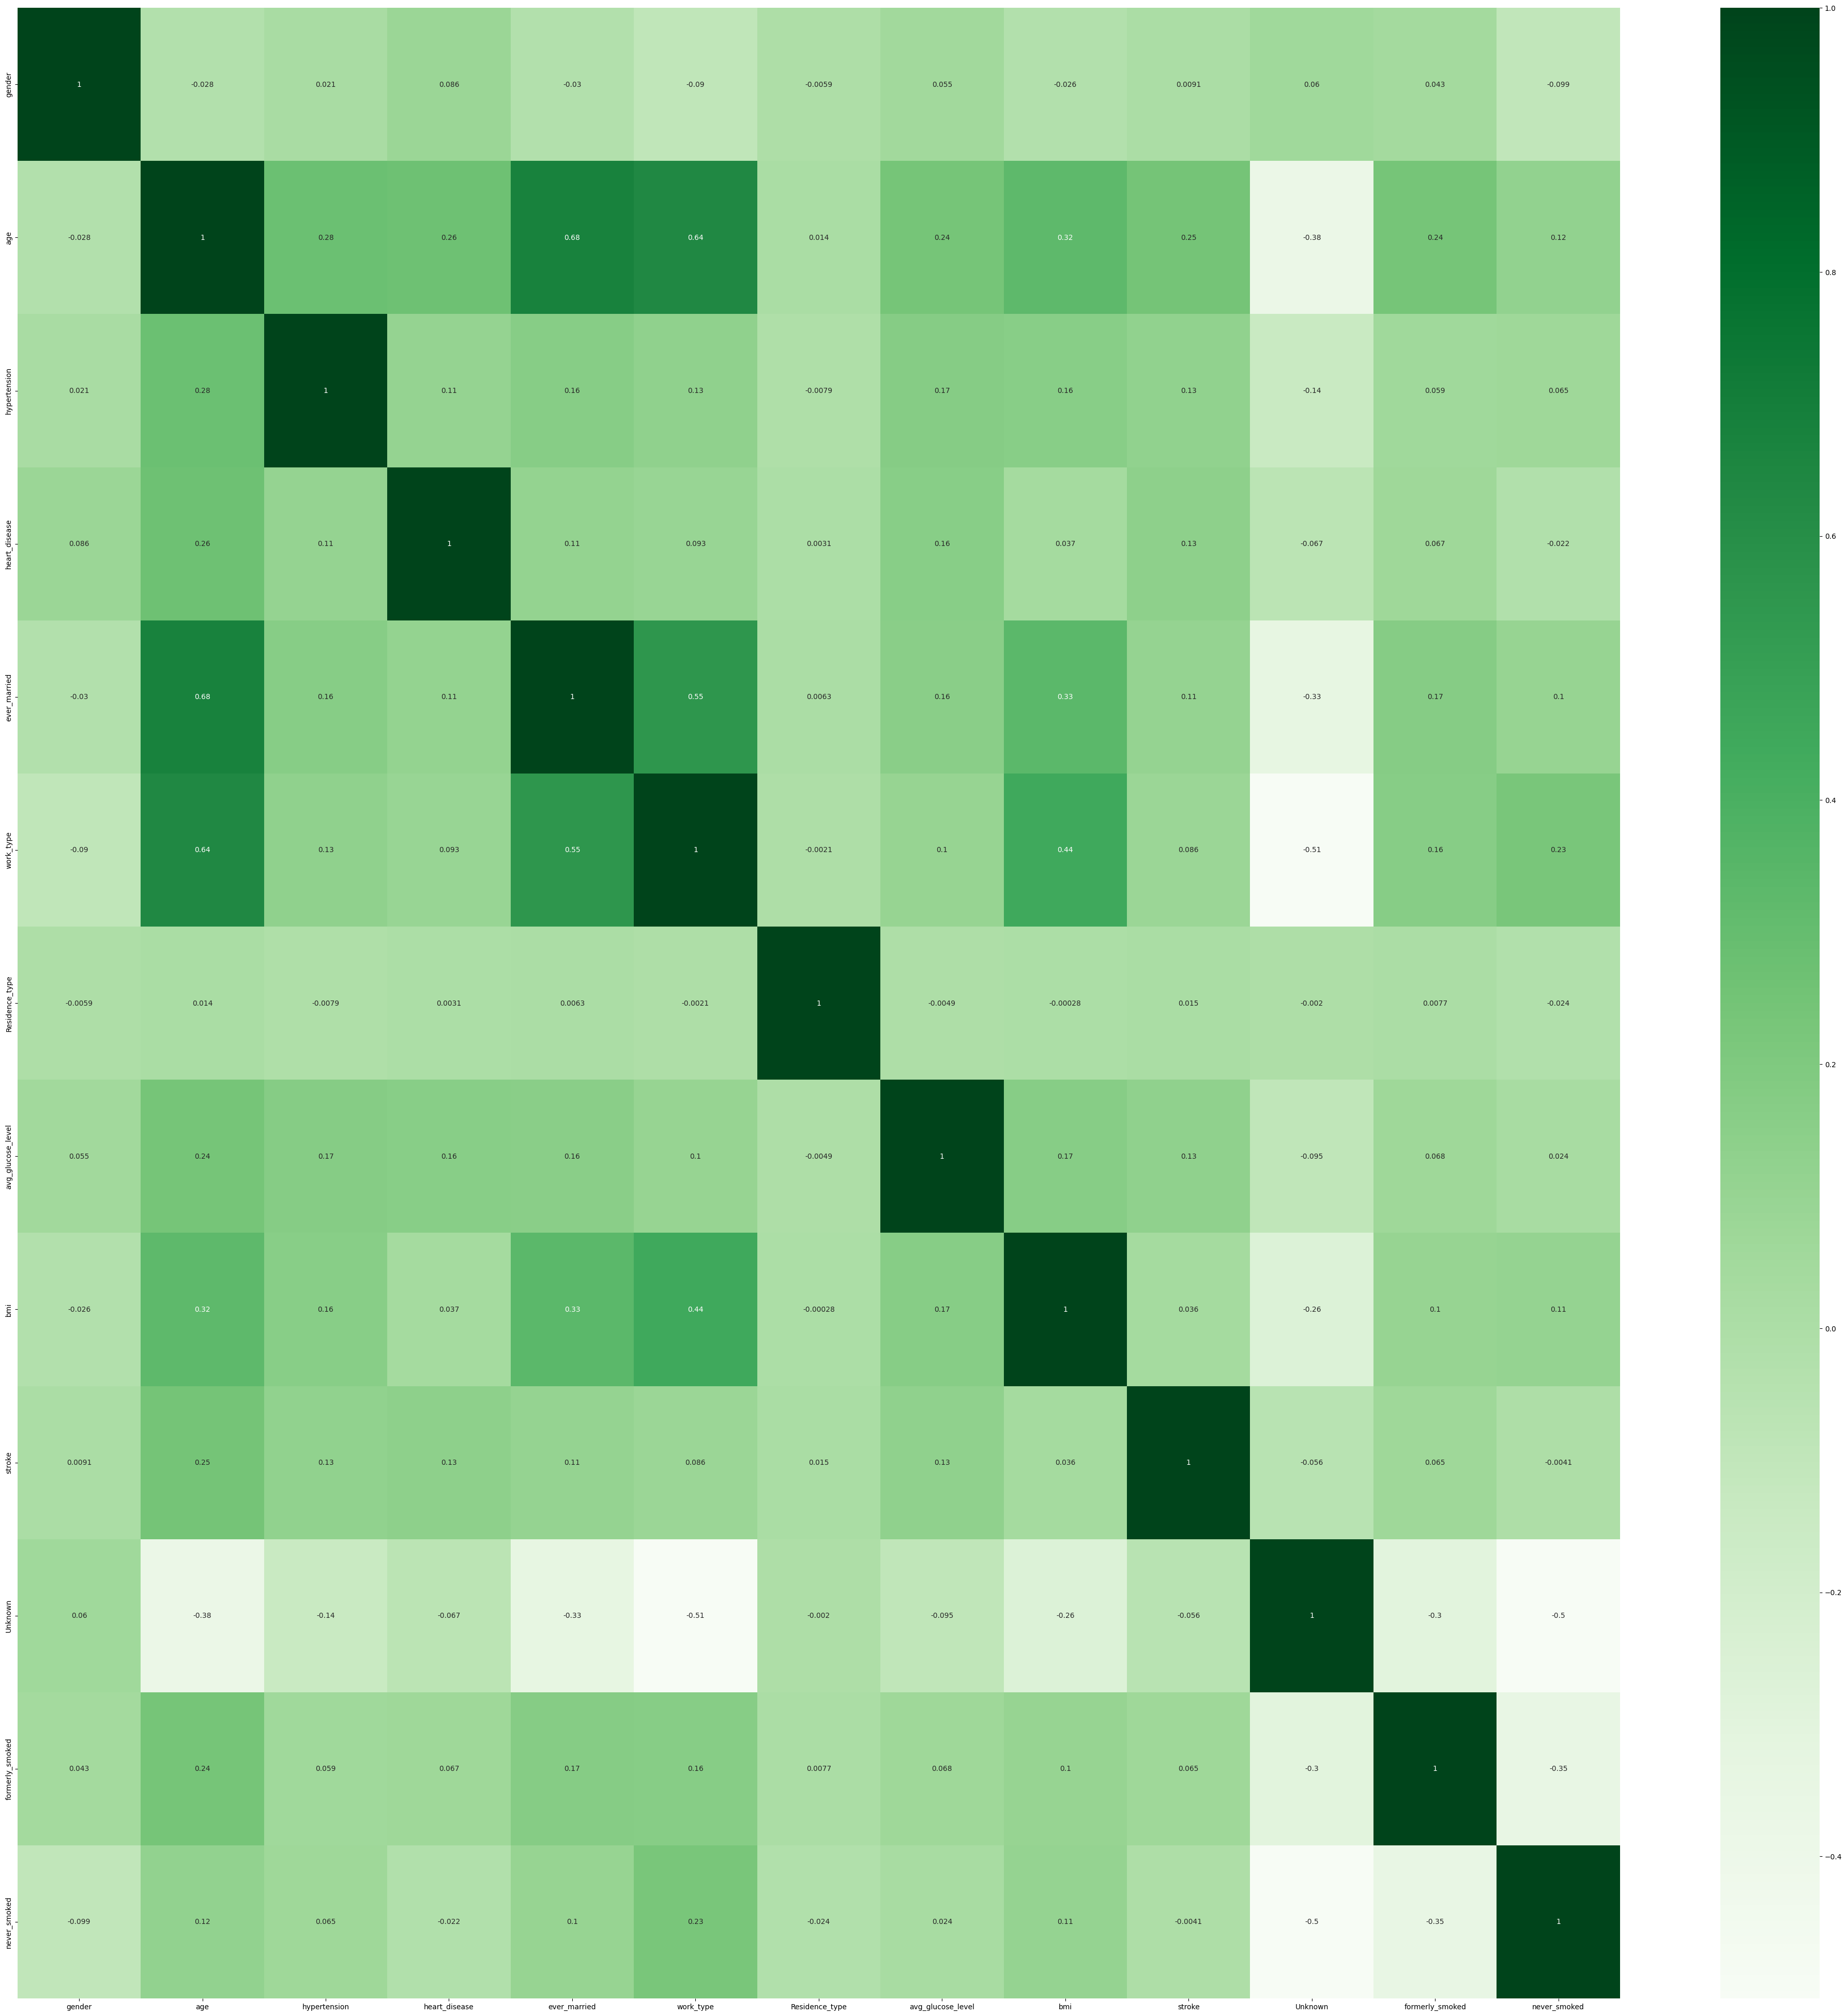

In [74]:
# Plotting the correlation using the heatmap
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),annot=True,cmap="Greens")

# Model Selection

* Defining the model/algorithm

In [75]:
lrc = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

# Splitting the dataset

In [76]:
X = df.drop('stroke', axis = 1) # Features
y = df.stroke # Target

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Training the Model

In [78]:
lrc.fit(X_train,y_train)
svc.fit(X_train,y_train)
dtc.fit(X_train,y_train)
rfc.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

#Testing the model

In [79]:
# Predicting the values
lrc_y_pred = lrc.predict(X_test)
svc_y_pred = svc.predict(X_test)
dtc_y_pred = dtc.predict(X_test)
rfc_y_pred = rfc.predict(X_test)

In [80]:
# Creating DataFarme
final_df = pd.DataFrame({'Actual_value':y_test,
                         'lrc':lrc_y_pred,
                         'svc':svc_y_pred,
                         'dtc':dtc_y_pred,
                         'rfc':rfc_y_pred})

In [81]:
final_df

,Actual_value,lrc,svc,dtc,rfc
4688,0,0,0,0,0
4478,0,0,0,0,0
3849,0,0,0,0,0
4355,0,0,0,1,0
3826,0,0,0,0,0
...,...,...,...,...,...
3605,0,0,0,0,0
4934,0,0,0,0,0
4835,0,0,0,0,0
4105,0,0,0,0,0


#Performance Checking

* For LogisticRegression

In [82]:
confusion_matrix(y_test, lrc_y_pred)

array([[960,   0],
       [ 62,   0]])

In [83]:
960/(960+62)

0.9393346379647749

For LogisticRegression the accuracy score is approximately 94%

* For Support Vector Classifier

In [84]:
confusion_matrix(y_test, svc_y_pred)

array([[960,   0],
       [ 62,   0]])

In [85]:
960/(960+62)

0.9393346379647749

For Support Vector Classifier the accuracy score is approximately 94%

* For DecisionTreeClassifier

In [86]:
confusion_matrix(y_test, dtc_y_pred)

array([[924,  36],
       [ 54,   8]])

In [87]:
(926+7)/(926+55+34)

0.9192118226600985

For DecisionTreeClassifier the accuracy score is approximately 92%

* For RandomForestClassifier

In [88]:
confusion_matrix(y_test, rfc_y_pred)

array([[959,   1],
       [ 62,   0]])

In [89]:
accuracy_score(y_test, rfc_y_pred)

0.9383561643835616

For RandomForestClassifier the accuracy score is approximately 94%